# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Functions

In [2]:
def add_value_labels(ax, spacing=5):
    # Função adaptada do Stak Oveflow no link: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
    # Esta função adiciona os value labels acima da barra no gráfico abaixo

    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            

            
def player_rating(name, df):
    rating = []
    for index in range(len(df)):
        if df['white_player'][index] == name:
            rating.append([pd.to_datetime(df['createdAt'][index]).date(), df['speed'][index], df['rating'][index]])
        else:
            rating.append([pd.to_datetime(df['createdAt'][index]).date(), df['speed'][index], df['rating.1'][index]])
    return rating


def clean_rating(df):
    """Cleans the comma from rating column in df"""
    comma = [x[0:-1] if x[-1] ==',' else x for x in df.rating]
    return comma
    

def first_move(dataframe):
    """This function returns a list with the pawn opening. For this classification
    was created four categories of pawn opening: king pawn, queen pawn, english opening and others"""
    first = []
    for item in range(len(dataframe)):
        if dataframe.moves[item][0:2] == 'e4':
            first.append('king pawn')
        elif dataframe.moves[item][0:2] == 'd4':
            first.append('queen pawn')
        elif dataframe.moves[item][0:2] == 'c4':
            first.append('english opening')
        else:
            first.append( 'others')
    return first

# Reading Data

In [3]:
df = pd.read_csv('game_data.csv')
df.drop('Unnamed: 0', axis = 'columns', inplace=True)
df

,rated,variant,speed,perf,createdAt,status,winner,moves,clock,ECO,opening_name,white_player,rating,black_player,rating.1
0,True,standard,blitz,blitz,2022-10-28 23:10:50.756000+00:00,mate,black,e4 c6 d4 d5 exd5 cxd5 Nc3 Nf6 Bg5 h6 Bxf6 exf6...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Exchange Variation,'stanislawzuk',1366,'chestroyer',1398
1,True,standard,blitz,blitz,2022-10-28 22:31:28.553000+00:00,mate,black,d4 Nf6 c4 g6 Nc3 d5 Nf3 Bg7 e4 Bg4 Ne5 Bxd1 Nx...,"{'initial': 180, 'increment': 0, 'totalTime': ...",D90,Grünfeld Defense: Three Knights Variation,'santanu',1397,'chestroyer',1393
2,True,standard,blitz,blitz,2022-10-28 19:20:13.624000+00:00,mate,white,e4 e5 Nf3 Nf6 Nxe5 Nc6 Nxc6 dxc6 d3 Bc5 g3 Qd4...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C42,Russian Game: Stafford Gambit,'chestroyer',1387,'tolekbanan',1416
3,True,standard,blitz,blitz,2022-10-28 19:10:17.591000+00:00,mate,white,e4 e5 Nf3 Nc6 Bb5 Nge7 O-O a6 Ba4 b5 Bb3 g6 c3...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C60,Ruy Lopez: Cozio Defense,'chestroyer',1381,'mexfr',1386
4,True,standard,blitz,blitz,2022-10-28 19:05:03.104000+00:00,mate,white,e4 c6 d4 d5 exd5 cxd5 c4 e6 Nf3 Nc6 Nc3 Bb4 Qb...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Panov Attack,'anjal132',1325,'chestroyer',1388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241
1276,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506
1277,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346
1278,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500


In [4]:
df.describe()

,rated,variant,speed,perf,createdAt,status,winner,moves,clock,ECO,opening_name,white_player,rating,black_player,rating.1
count,1280,1280,1280,1280,1280,1280,1232,1280,1278,1280,1280,1280,1280,1280,1280
unique,2,2,5,5,1280,6,2,1280,15,151,339,637,615,630,606
top,True,standard,blitz,blitz,2022-10-28 23:10:50.756000+00:00,mate,white,e4 c6 d4 d5 exd5 cxd5 Nc3 Nf6 Bg5 h6 Bxf6 exf6...,"{'initial': 300, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense,'chestroyer',1500,'chestroyer',1500
freq,1271,1274,610,610,1,526,671,1,331,80,57,638,15,642,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rated         1280 non-null   bool  
 1   variant       1280 non-null   object
 2   speed         1280 non-null   object
 3   perf          1280 non-null   object
 4   createdAt     1280 non-null   object
 5   status        1280 non-null   object
 6   winner        1232 non-null   object
 7   moves         1280 non-null   object
 8   clock         1278 non-null   object
 9   ECO           1280 non-null   object
 10  opening_name  1280 non-null   object
 11  white_player  1280 non-null   object
 12  rating        1280 non-null   object
 13  black_player  1280 non-null   object
 14  rating.1      1280 non-null   object
dtypes: bool(1), object(14)
memory usage: 141.4+ KB


In [6]:
df['pawn_opening'] = first_move(df)
df

,rated,variant,speed,perf,createdAt,status,winner,moves,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
0,True,standard,blitz,blitz,2022-10-28 23:10:50.756000+00:00,mate,black,e4 c6 d4 d5 exd5 cxd5 Nc3 Nf6 Bg5 h6 Bxf6 exf6...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Exchange Variation,'stanislawzuk',1366,'chestroyer',1398,king pawn
1,True,standard,blitz,blitz,2022-10-28 22:31:28.553000+00:00,mate,black,d4 Nf6 c4 g6 Nc3 d5 Nf3 Bg7 e4 Bg4 Ne5 Bxd1 Nx...,"{'initial': 180, 'increment': 0, 'totalTime': ...",D90,Grünfeld Defense: Three Knights Variation,'santanu',1397,'chestroyer',1393,queen pawn
2,True,standard,blitz,blitz,2022-10-28 19:20:13.624000+00:00,mate,white,e4 e5 Nf3 Nf6 Nxe5 Nc6 Nxc6 dxc6 d3 Bc5 g3 Qd4...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C42,Russian Game: Stafford Gambit,'chestroyer',1387,'tolekbanan',1416,king pawn
3,True,standard,blitz,blitz,2022-10-28 19:10:17.591000+00:00,mate,white,e4 e5 Nf3 Nc6 Bb5 Nge7 O-O a6 Ba4 b5 Bb3 g6 c3...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C60,Ruy Lopez: Cozio Defense,'chestroyer',1381,'mexfr',1386,king pawn
4,True,standard,blitz,blitz,2022-10-28 19:05:03.104000+00:00,mate,white,e4 c6 d4 d5 exd5 cxd5 c4 e6 Nf3 Nc6 Nc3 Bb4 Qb...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Panov Attack,'anjal132',1325,'chestroyer',1388,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,king pawn
1276,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,english opening
1277,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,king pawn
1278,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500,king pawn


In [7]:
player_name = "'chestroyer'"

## Statistical Distributions

In [8]:
df.columns
columns_of_interest = ['rated', 'speed', 'status', 'winner', 'pawn_opening', 'ECO', 'opening_name', 'moves']
for column in columns_of_interest:
    print('-'*120)
    print(f'{column} analysis:\n{df[column].value_counts()}')

------------------------------------------------------------------------------------------------------------------------
rated analysis:
True     1271
False       9
Name: rated, dtype: int64
------------------------------------------------------------------------------------------------------------------------
speed analysis:
blitz             610
classical         321
rapid             215
bullet            132
correspondence      2
Name: speed, dtype: int64
------------------------------------------------------------------------------------------------------------------------
status analysis:
mate         526
resign       388
outoftime    272
timeout       47
draw          25
stalemate     22
Name: status, dtype: int64
------------------------------------------------------------------------------------------------------------------------
winner analysis:
white    671
black    561
Name: winner, dtype: int64
------------------------------------------------------------------------------

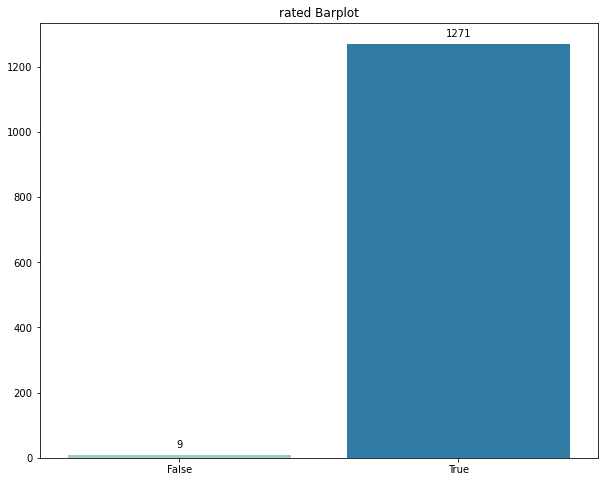

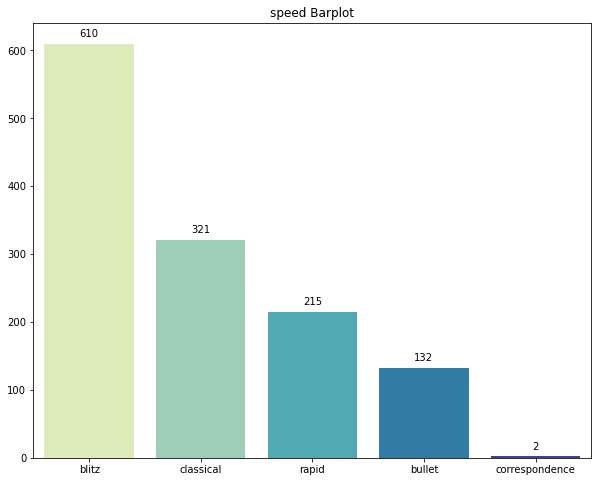

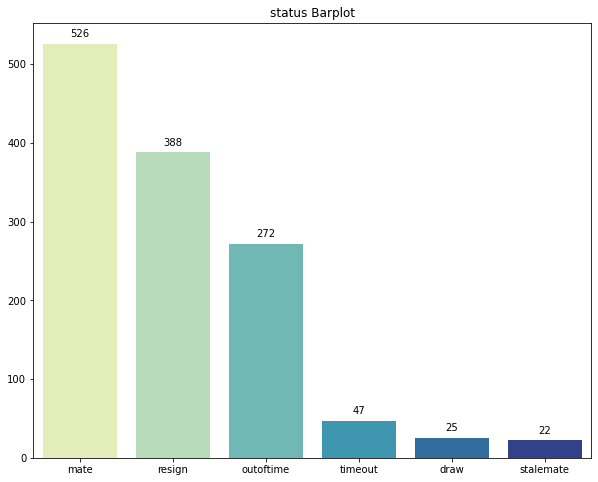

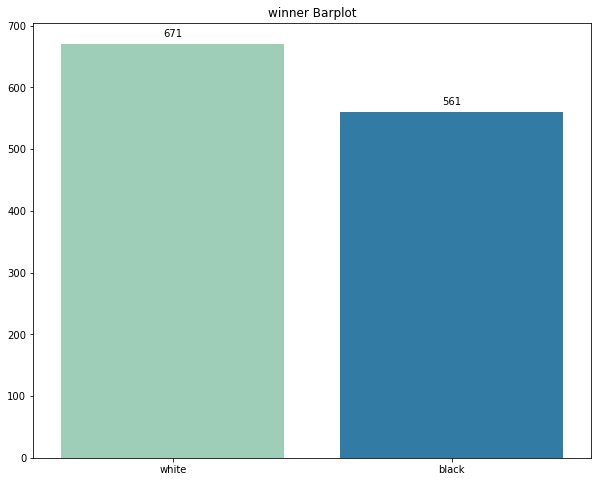

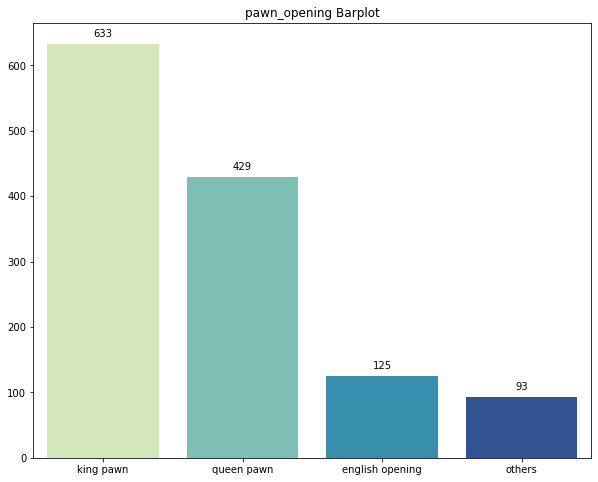

In [9]:
for column in columns_of_interest[0:5]:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x= df[column].value_counts().index, y=df[column].value_counts().values, palette='YlGnBu', ax=ax)
    plt.title(f'{column} Barplot')
    add_value_labels(ax)

# Gameplay Style

## Playing as White

In [10]:
playing_white = df.loc[df['white_player'] == player_name, :]
playing_white

,rated,variant,speed,perf,createdAt,status,winner,moves,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
2,True,standard,blitz,blitz,2022-10-28 19:20:13.624000+00:00,mate,white,e4 e5 Nf3 Nf6 Nxe5 Nc6 Nxc6 dxc6 d3 Bc5 g3 Qd4...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C42,Russian Game: Stafford Gambit,'chestroyer',1387,'tolekbanan',1416,king pawn
3,True,standard,blitz,blitz,2022-10-28 19:10:17.591000+00:00,mate,white,e4 e5 Nf3 Nc6 Bb5 Nge7 O-O a6 Ba4 b5 Bb3 g6 c3...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C60,Ruy Lopez: Cozio Defense,'chestroyer',1381,'mexfr',1386,king pawn
6,True,standard,blitz,blitz,2022-10-26 22:51:56.253000+00:00,resign,black,e4 d5 exd5 Qxd5 Nc3 Qa5 Nf3 e6 d4 Nf6 Bd3 Nd5 ...,"{'initial': 180, 'increment': 2, 'totalTime': ...",B01,Scandinavian Defense: Main Line,'chestroyer',1399,'hoseinearth',1280,king pawn
8,True,standard,blitz,blitz,2022-10-25 13:35:03.172000+00:00,resign,black,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 b5 Bb3 Bd6 O-O Nf6 d3...,"{'initial': 300, 'increment': 0, 'totalTime': ...",C70,"Ruy Lopez: Morphy Defense, Caro Variation",'chestroyer',1412,'luciamissmaster',1390,king pawn
10,True,standard,blitz,blitz,2022-10-23 01:39:07.956000+00:00,resign,white,e4 d6 Nf3 Nf6 d3 g6 Bg5 Nbd7 Be2 h6 Be3 Ng4 Bd...,"{'initial': 300, 'increment': 0, 'totalTime': ...",B00,Pirc Defense,'chestroyer',1412,'m1lgr4uu',1353,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,True,standard,bullet,bullet,2019-04-24 22:38:23.732000+00:00,resign,black,Nf3 Nf6 e4 g6 Bc4 Bg7 d4 O-O Bg5 d6 O-O b6 e5 ...,"{'initial': 60, 'increment': 0, 'totalTime': 60}",A05,Zukertort Opening: Lemberger Gambit,'chestroyer',1500,'lordfarsomin',1497,others
1272,True,standard,classical,classical,2019-04-24 13:23:49.627000+00:00,resign,black,Nf3 c5 e4 d6 Bb5+ Bd7 a4 Nc6 O-O g6 d4 cxd4 Nx...,"{'initial': 900, 'increment': 15, 'totalTime':...",B52,"Sicilian Defense: Canal Attack, Main Line",'chestroyer',1406,'mateifaibis',1424,others
1274,True,standard,rapid,rapid,2019-04-16 14:24:02.081000+00:00,timeout,white,Nf3 e5 d3 d6 e4 Nf6 Nc3 Be7 h3 O-O Bg5 a5 d4 e...,"{'initial': 600, 'increment': 0, 'totalTime': ...",A04,Zukertort Opening: Ross Gambit,'chestroyer',1152,'ahmaadd',1060,others
1276,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,english opening


### Winning rate playing as white

In [11]:
print(playing_white.winner.value_counts())
print('-'*100)
print(playing_white.winner.value_counts(normalize=True)*100)

white    357
black    259
Name: winner, dtype: int64
----------------------------------------------------------------------------------------------------
white    57.954545
black    42.045455
Name: winner, dtype: float64


### Most played openings (ECO and name)

In [12]:
playing_white.ECO.value_counts()

A40    48
D20    38
D06    28
D00    28
A20    26
       ..
A65     1
C74     1
A18     1
D05     1
B52     1
Name: ECO, Length: 117, dtype: int64

In [13]:
playing_white.opening_name.value_counts()

English Opening: King's English Variation                        26
Queen's Pawn Game: Accelerated London System                     24
Queen's Gambit Declined: Marshall Defense                        22
Philidor Defense                                                 21
Horwitz Defense                                                  18
                                                                 ..
Queen's Gambit Accepted: Central Variation, McDonnell Defense     1
Scotch Game: Scotch Gambit, Dubois Réti Defense                   1
Blackmar-Diemer Gambit Declined: Lamb Defense                     1
Ruy Lopez: Berlin Defense, Rio Gambit Accepted                    1
Zukertort Opening: Ross Gambit                                    1
Name: opening_name, Length: 225, dtype: int64

### Most succesful openings (that resulted in a win)

In [14]:
playing_white.loc[playing_white.winner=='white', 'ECO'].value_counts()

A40    33
D20    19
C41    17
D06    17
A20    17
       ..
B10     1
B13     1
C24     1
B29     1
D94     1
Name: ECO, Length: 85, dtype: int64

In [15]:
playing_white.loc[playing_white.winner=='white', 'opening_name'].value_counts()

English Opening: King's English Variation               17
Philidor Defense                                        16
Queen's Pawn Game: Accelerated London System            12
Queen's Gambit Declined: Marshall Defense               12
Queen's Pawn Game                                       10
                                                        ..
Scotch Game: Scotch Gambit, Dubois Réti Defense          1
King's Knight Opening                                    1
English Opening                                          1
Italian Game: Classical Variation, Giuoco Pianissimo     1
Zukertort Opening: Ross Gambit                           1
Name: opening_name, Length: 159, dtype: int64

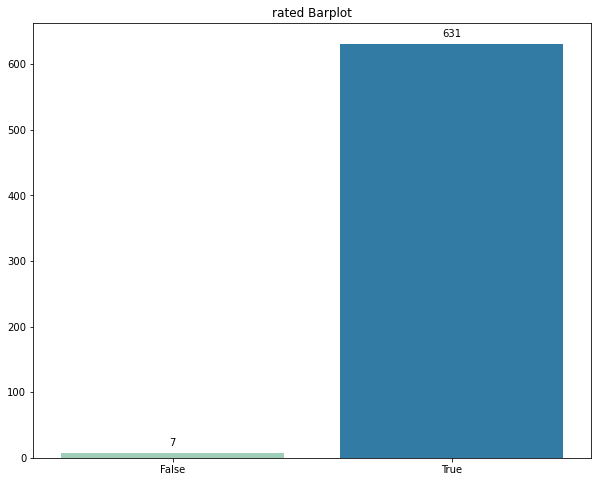

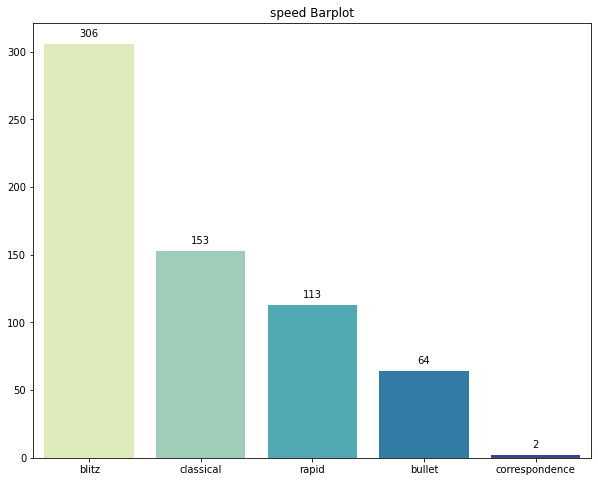

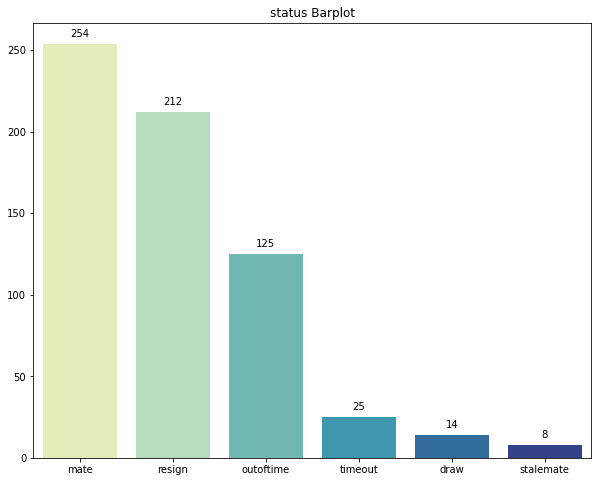

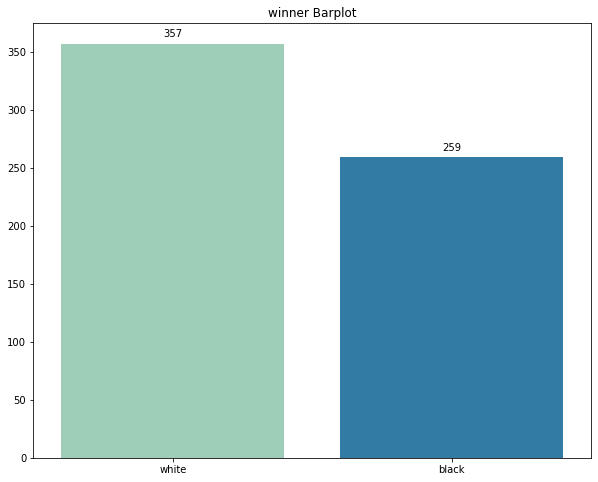

In [16]:
for column in columns_of_interest[0:4]:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x= playing_white[column].value_counts().index, y=playing_white[column].value_counts().values, palette='YlGnBu', ax=ax)
    plt.title(f'{column} Barplot')
    add_value_labels(ax)

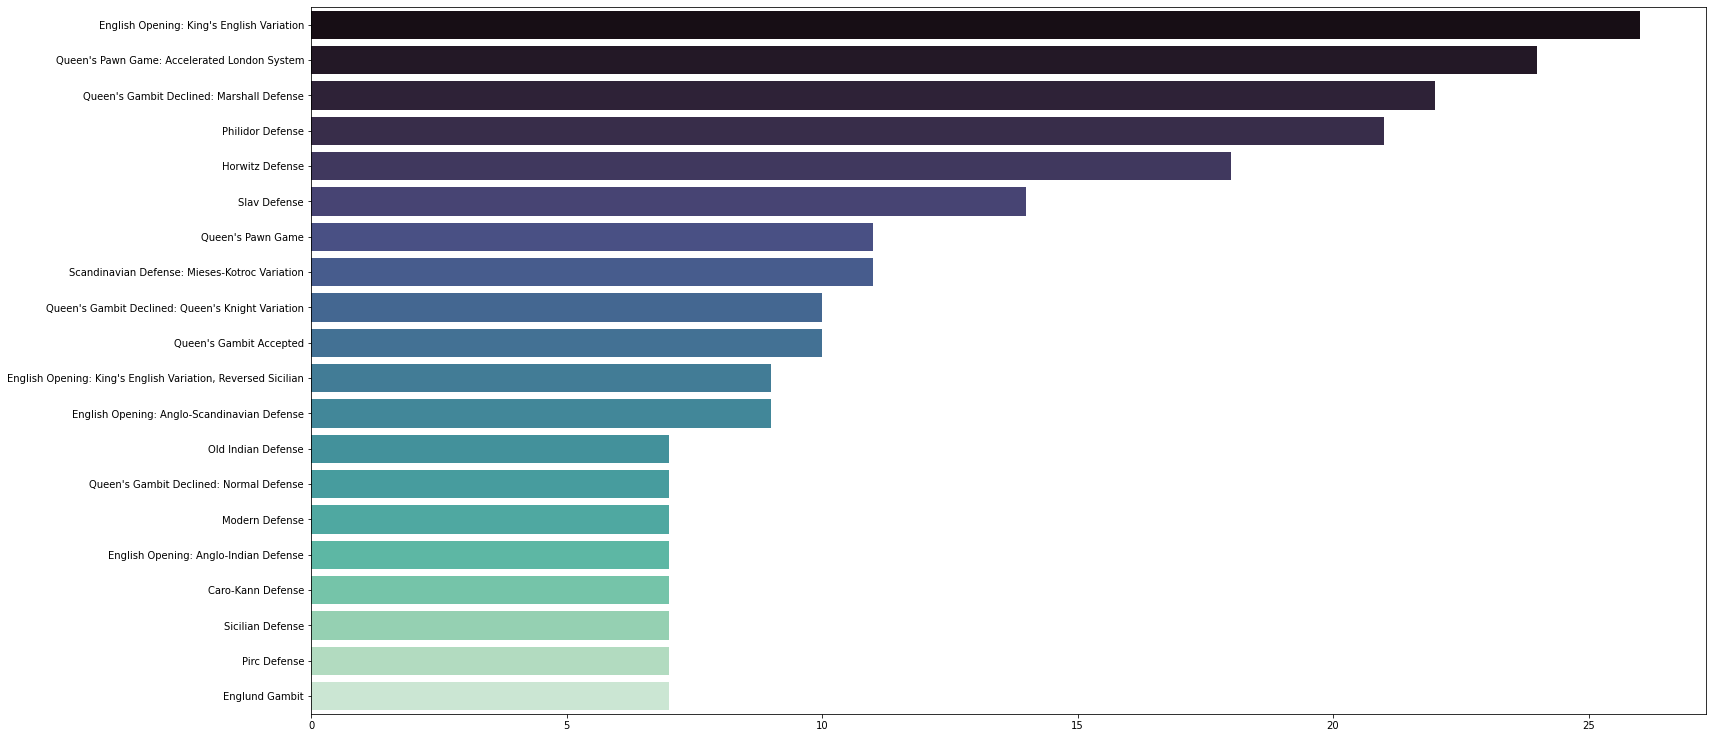

In [17]:
fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=playing_white['opening_name'].value_counts().values[0:20], 
                 y=playing_white['opening_name'].value_counts().index[0:20],
                 palette='mako')

# Playing as Black

In [18]:
playing_black = df.loc[df['black_player'] == player_name, :]
playing_black

,rated,variant,speed,perf,createdAt,status,winner,moves,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
0,True,standard,blitz,blitz,2022-10-28 23:10:50.756000+00:00,mate,black,e4 c6 d4 d5 exd5 cxd5 Nc3 Nf6 Bg5 h6 Bxf6 exf6...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Exchange Variation,'stanislawzuk',1366,'chestroyer',1398,king pawn
1,True,standard,blitz,blitz,2022-10-28 22:31:28.553000+00:00,mate,black,d4 Nf6 c4 g6 Nc3 d5 Nf3 Bg7 e4 Bg4 Ne5 Bxd1 Nx...,"{'initial': 180, 'increment': 0, 'totalTime': ...",D90,Grünfeld Defense: Three Knights Variation,'santanu',1397,'chestroyer',1393,queen pawn
4,True,standard,blitz,blitz,2022-10-28 19:05:03.104000+00:00,mate,white,e4 c6 d4 d5 exd5 cxd5 c4 e6 Nf3 Nc6 Nc3 Bb4 Qb...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Panov Attack,'anjal132',1325,'chestroyer',1388,king pawn
5,True,standard,blitz,blitz,2022-10-28 18:56:49.044000+00:00,mate,white,d4 Nf6 c4 g6 Nc3 d5 Bf4 Bg7 Nf3 O-O e3 dxc4 Bx...,"{'initial': 180, 'increment': 2, 'totalTime': ...",D93,"Grünfeld Defense: Three Knights Variation, Hun...",'aminmortazavi2000',1501,'chestroyer',1392,queen pawn
7,True,standard,blitz,blitz,2022-10-25 13:41:24.637000+00:00,resign,white,d4 Nf6 Nf3 g6 Nc3 d6 Bg5 Bg7 e3 O-O Bd3 Nbd7 O...,"{'initial': 300, 'increment': 0, 'totalTime': ...",A48,East Indian Defense,'nags1987',1377,'chestroyer',1405,queen pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,True,standard,classical,classical,2019-04-24 13:33:17.318000+00:00,mate,white,e4 c6 Nf3 d5 e5 e6 g3 Bc5 d4 Bb6 Bg2 Ne7 O-O O...,"{'initial': 900, 'increment': 15, 'totalTime':...",B10,Caro-Kann Defense,'mateifaibis',1433,'chestroyer',1309,king pawn
1273,True,standard,classical,classical,2019-04-18 11:48:37.237000+00:00,mate,white,e4 c5 Nc3 e6 Nf3 Nc6 d4 a6 d5 Nd4 Nxd4 cxd4 Qx...,"{'initial': 900, 'increment': 15, 'totalTime':...",B23,Sicilian Defense: Closed,'ma_diamond',1500,'chestroyer',1504,king pawn
1275,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,king pawn
1277,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,king pawn


### Winning rate as black

In [19]:
print(playing_black['winner'].value_counts())
print('-'*100)
print(playing_black['winner'].value_counts(normalize=True)*100)

white    314
black    302
Name: winner, dtype: int64
----------------------------------------------------------------------------------------------------
white    50.974026
black    49.025974
Name: winner, dtype: float64


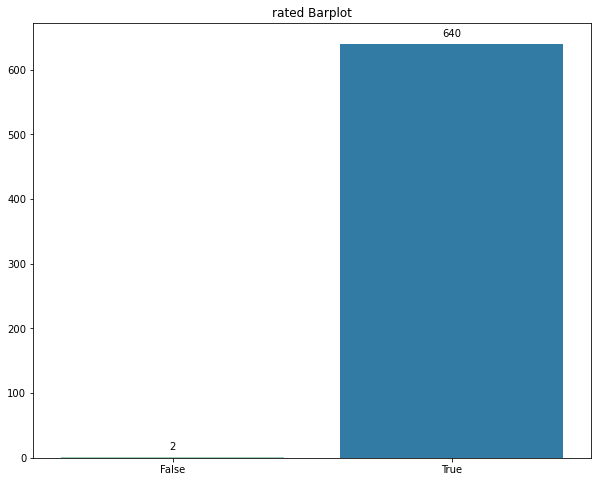

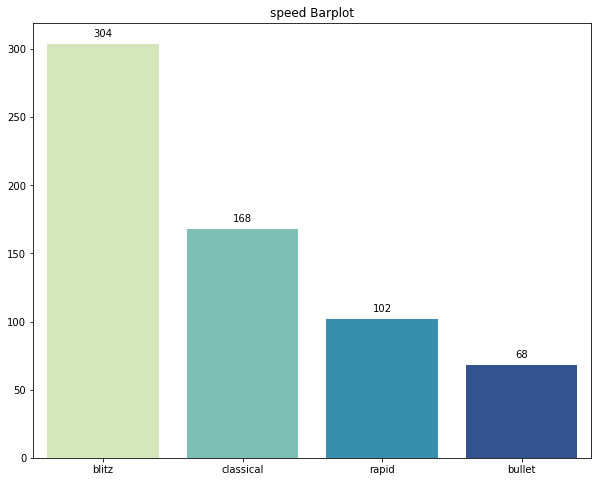

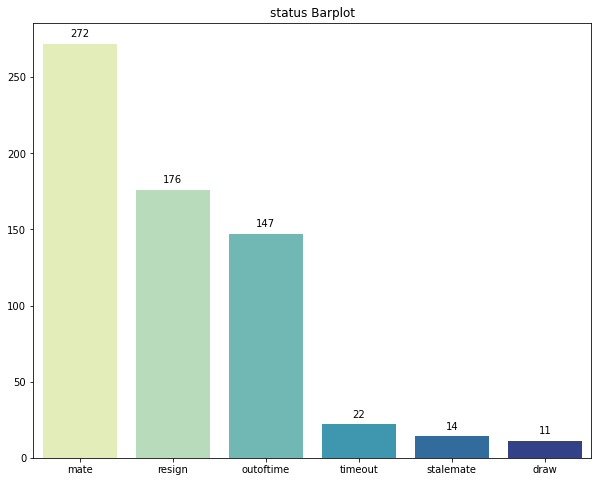

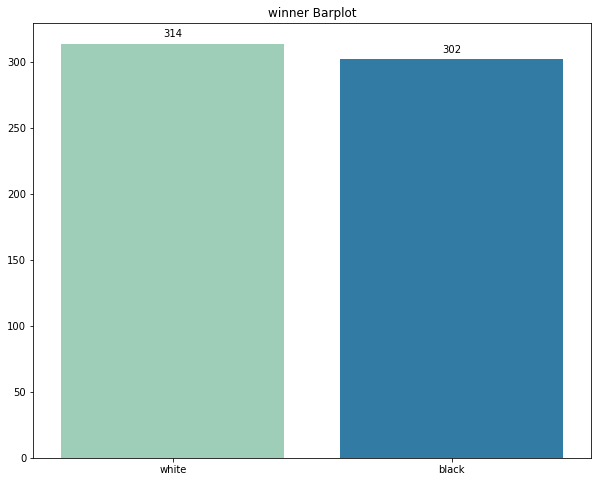

In [20]:
for column in columns_of_interest[0:4]:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x= playing_black[column].value_counts().index, y=playing_black[column].value_counts().values, palette='YlGnBu', ax=ax)
    plt.title(f'{column} Barplot')
    add_value_labels(ax)

### Most played openings as black

In [21]:
playing_black.ECO.value_counts()

B20    75
C00    59
A45    56
B50    48
B10    34
       ..
B46     1
D37     1
D50     1
E65     1
C41     1
Name: ECO, Length: 93, dtype: int64

In [22]:
playing_black.opening_name.value_counts()[0:15]

Sicilian Defense                                         50
Indian Defense                                           43
Sicilian Defense: Bowdler Attack                         33
Sicilian Defense: Modern Variations                      27
Caro-Kann Defense                                        25
French Defense: Knight Variation                         25
Sicilian Defense: Smith-Morra Gambit                     22
Sicilian Defense: Closed                                 21
French Defense                                           14
Sicilian Defense: French Variation                       12
East Indian Defense                                      12
French Defense: Advance Variation, Nimzowitsch System    11
French Defense: Advance Variation                        11
London System                                            10
Hungarian Opening                                        10
Name: opening_name, dtype: int64

In [23]:
strip_opening_b = [str(x).split(':')[0] for x in playing_black.opening_name.value_counts().index]
count_openings_b = [[x, strip_opening_b.count(str(x))] for x in strip_opening_b]
count_openings_unique_b = []

for l in count_openings_b:
    if l not in count_openings_unique_b:
        count_openings_unique_b.append(l)
count_openings_unique_b

[['Sicilian Defense', 37],
 ['Indian Defense', 9],
 ['Caro-Kann Defense', 15],
 ['French Defense', 18],
 ['East Indian Defense', 1],
 ['London System', 1],
 ['Hungarian Opening', 2],
 ["Van't Kruijs Opening", 1],
 ["Queen's Pawn Game", 9],
 ["King's Indian Defense", 12],
 ['Nimzo-Larsen Attack', 2],
 ["King's Indian Attack", 1],
 ['Trompowsky Attack', 2],
 ['Polish Opening', 2],
 ['Grünfeld Defense', 7],
 ['Old Indian Defense', 1],
 ['English Opening', 9],
 ['Neo-Grünfeld Defense', 3],
 ['Nimzo-Indian Defense', 1],
 ['Paleface Attack', 1],
 ['Pirc Defense', 1],
 ['None', 1],
 ['Van Geet Opening', 2],
 ["Bishop's Opening", 1],
 ['Russian Game', 4],
 ['Modern Defense', 1],
 ['Torre Attack', 2],
 ['Philidor Defense', 1],
 ["King's Pawn Game", 1],
 ['Vienna Game', 1],
 ['Amar Opening', 1],
 ['Zukertort Opening', 3],
 ["Queen's Gambit Declined", 4],
 ['Sodium Attack', 1],
 ['Bird Opening', 1],
 ['Benoni Defense', 1],
 ["King's Gambit Declined", 1],
 ['Four Knights Game', 2],
 ["King's Gambi

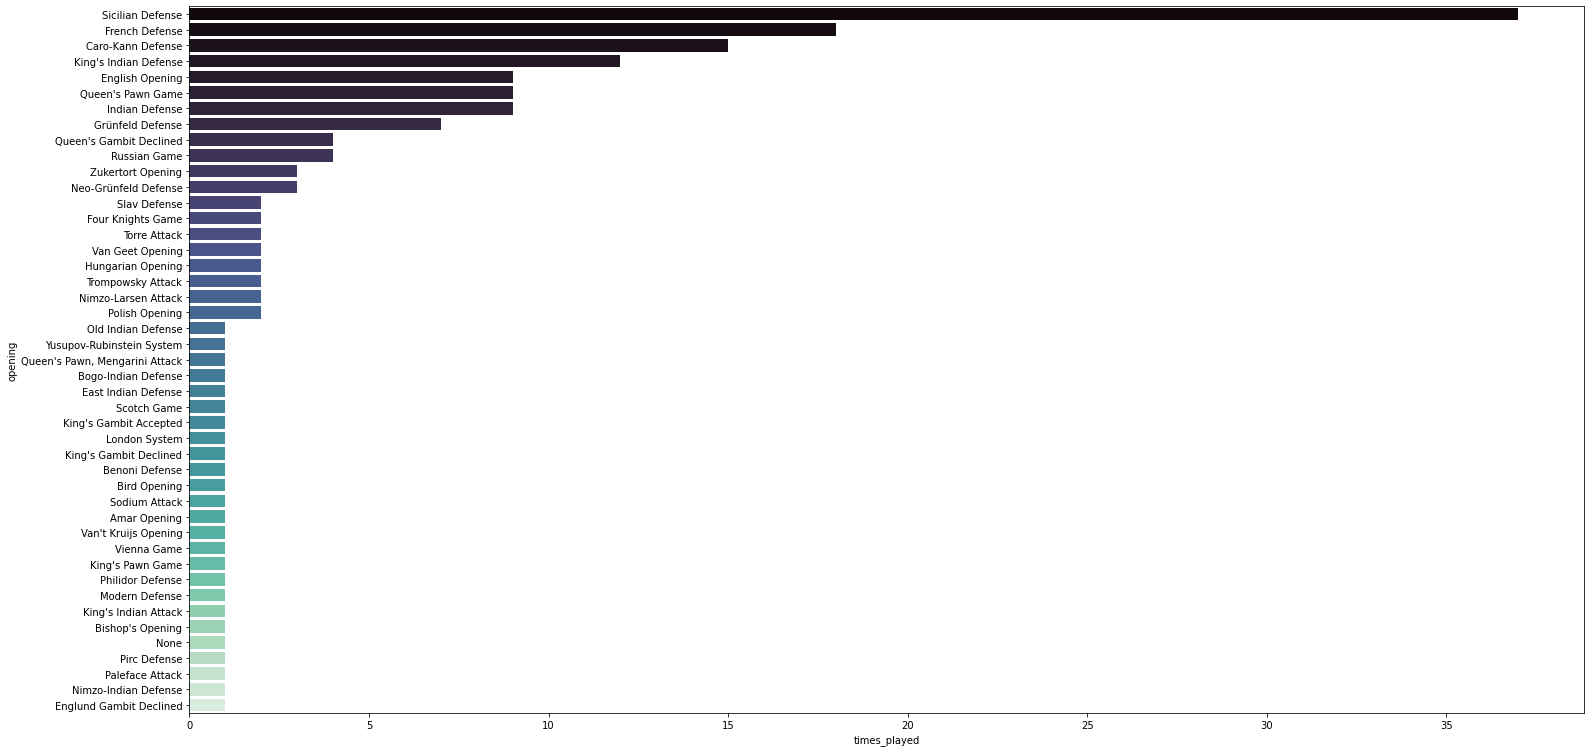

In [24]:
plot_df = pd.DataFrame(count_openings_unique_b, columns=['opening', 'times_played'])
plot_df = plot_df.sort_values(by=['times_played'], ascending=False)

fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=plot_df.times_played, 
                 y=plot_df.opening,
                 palette='mako')

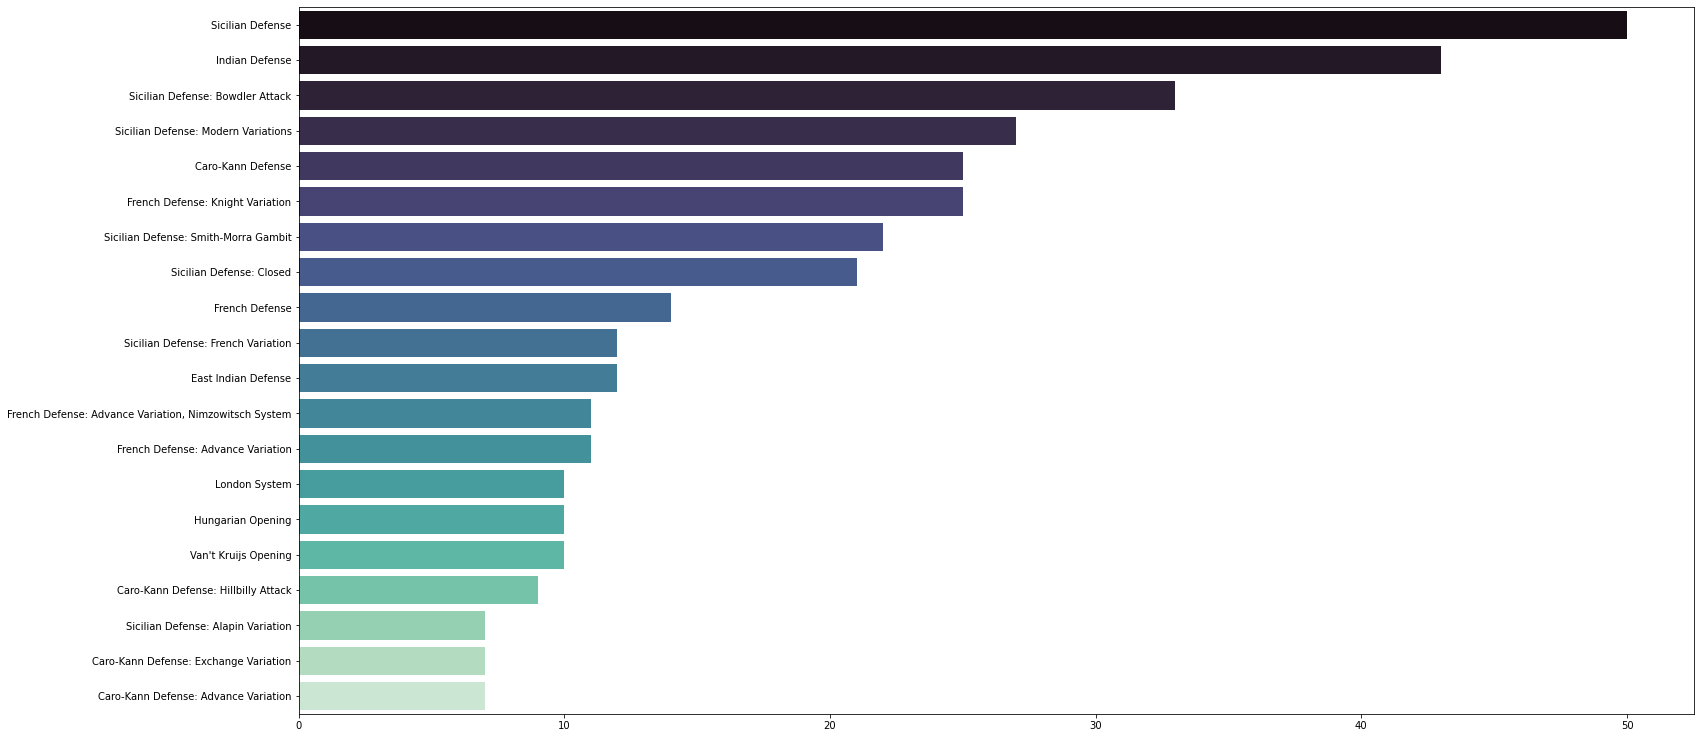

In [25]:
fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=playing_black['opening_name'].value_counts().values[0:20], 
                 y=playing_black['opening_name'].value_counts().index[0:20],
                 palette='mako')

### Most succesful openings as black

In [26]:
playing_black.loc[playing_black['winner']=='black', :].ECO.value_counts()[0:15]

B20    36
A45    29
C00    28
B10    20
B50    18
B21    15
A48    13
C02    13
B23    13
A00    13
B40    11
B12     9
B22     4
E60     4
B13     4
Name: ECO, dtype: int64

In [27]:
playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts()[0:15]

Indian Defense                                           22
Sicilian Defense                                         18
Sicilian Defense: Bowdler Attack                         17
Caro-Kann Defense                                        13
Sicilian Defense: Modern Variations                      13
Sicilian Defense: Closed                                 13
Sicilian Defense: Smith-Morra Gambit                     12
French Defense: Knight Variation                         10
French Defense                                            8
Caro-Kann Defense: Hillbilly Attack                       7
French Defense: Advance Variation, Nimzowitsch System     7
London System                                             6
Sicilian Defense: French Variation                        6
East Indian Defense                                       5
Hungarian Opening                                         4
Name: opening_name, dtype: int64

In [28]:
strip_opening_b2 = [str(x).split(':')[0] for x in playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts().index]
count_openings_b2 = [[x, strip_opening_b2.count(str(x))] for x in strip_opening_b2]
count_openings_unique_b2 = []

for l in count_openings_b2:
    if l not in count_openings_unique_b2:
        count_openings_unique_b2.append(l)
count_openings_unique_b2

[['Indian Defense', 6],
 ['Sicilian Defense', 24],
 ['Caro-Kann Defense', 9],
 ['French Defense', 13],
 ['London System', 1],
 ['East Indian Defense', 1],
 ['Hungarian Opening', 1],
 ["Queen's Pawn Game", 6],
 ["Van't Kruijs Opening", 1],
 ['Nimzo-Larsen Attack', 2],
 ['Old Indian Defense', 1],
 ['Paleface Attack', 1],
 ['Trompowsky Attack', 1],
 ['Grünfeld Defense', 4],
 ["King's Indian Defense", 10],
 ['Sodium Attack', 1],
 ['Amar Opening', 1],
 ['Bogo-Indian Defense', 1],
 ['English Opening', 5],
 ['Bird Opening', 1],
 ['Neo-Grünfeld Defense', 2],
 ['Torre Attack', 2],
 ["King's Indian Attack", 1],
 ['Zukertort Opening', 2],
 ['Polish Opening', 2],
 ['Nimzo-Indian Defense', 1],
 ["Queen's Pawn, Mengarini Attack", 1],
 ['Russian Game', 3],
 ['Van Geet Opening', 2],
 ['Englund Gambit Declined', 1],
 ['Slav Defense', 2],
 ["Queen's Gambit Declined", 2],
 ['None', 1],
 ['Yusupov-Rubinstein System', 1],
 ["King's Pawn Game", 1]]

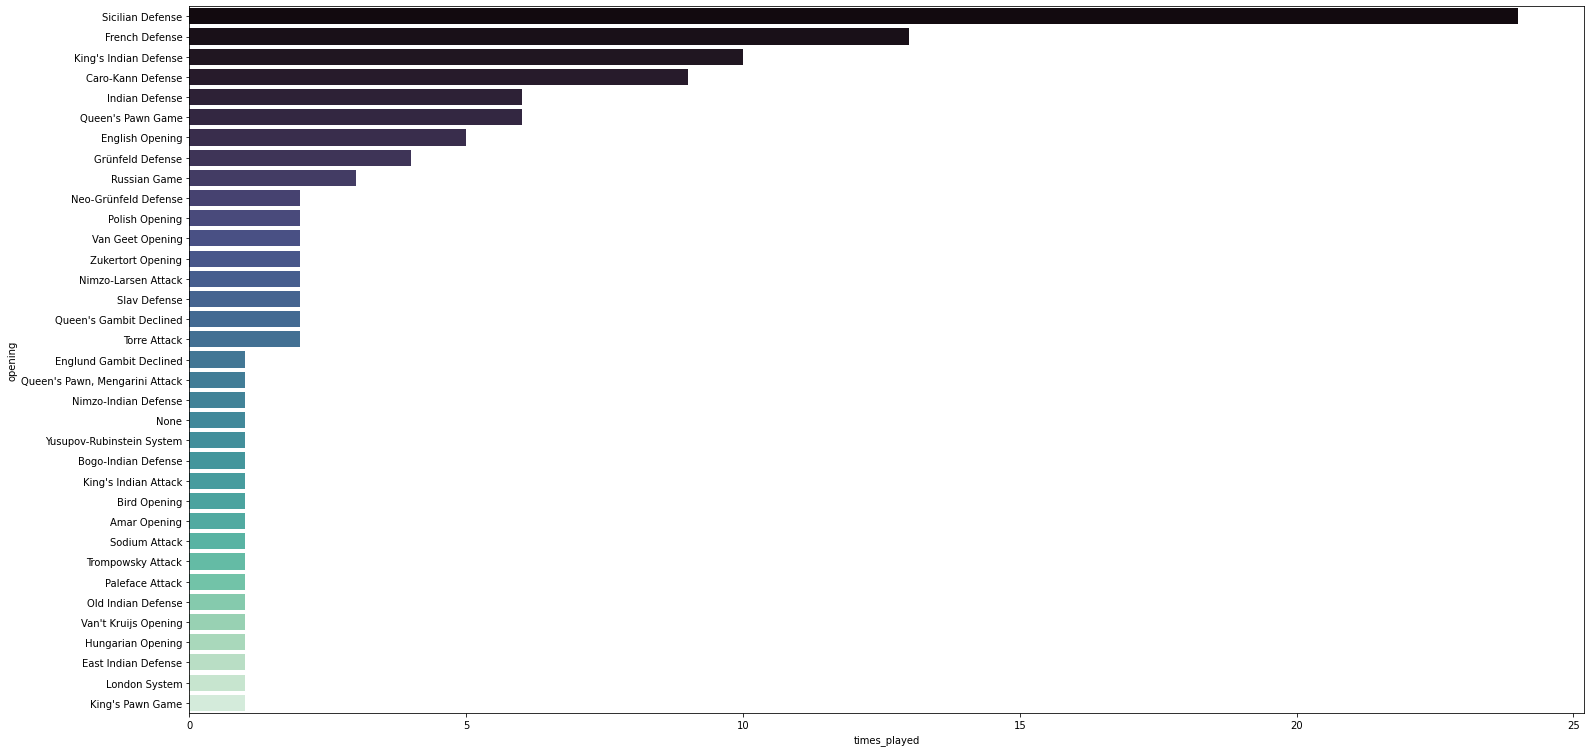

In [29]:
plot_df = pd.DataFrame(count_openings_unique_b2, columns=['opening', 'times_played'])
plot_df = plot_df.sort_values(by=['times_played'], ascending=False)

fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=plot_df.times_played, 
                 y=plot_df.opening,
                 palette='mako')

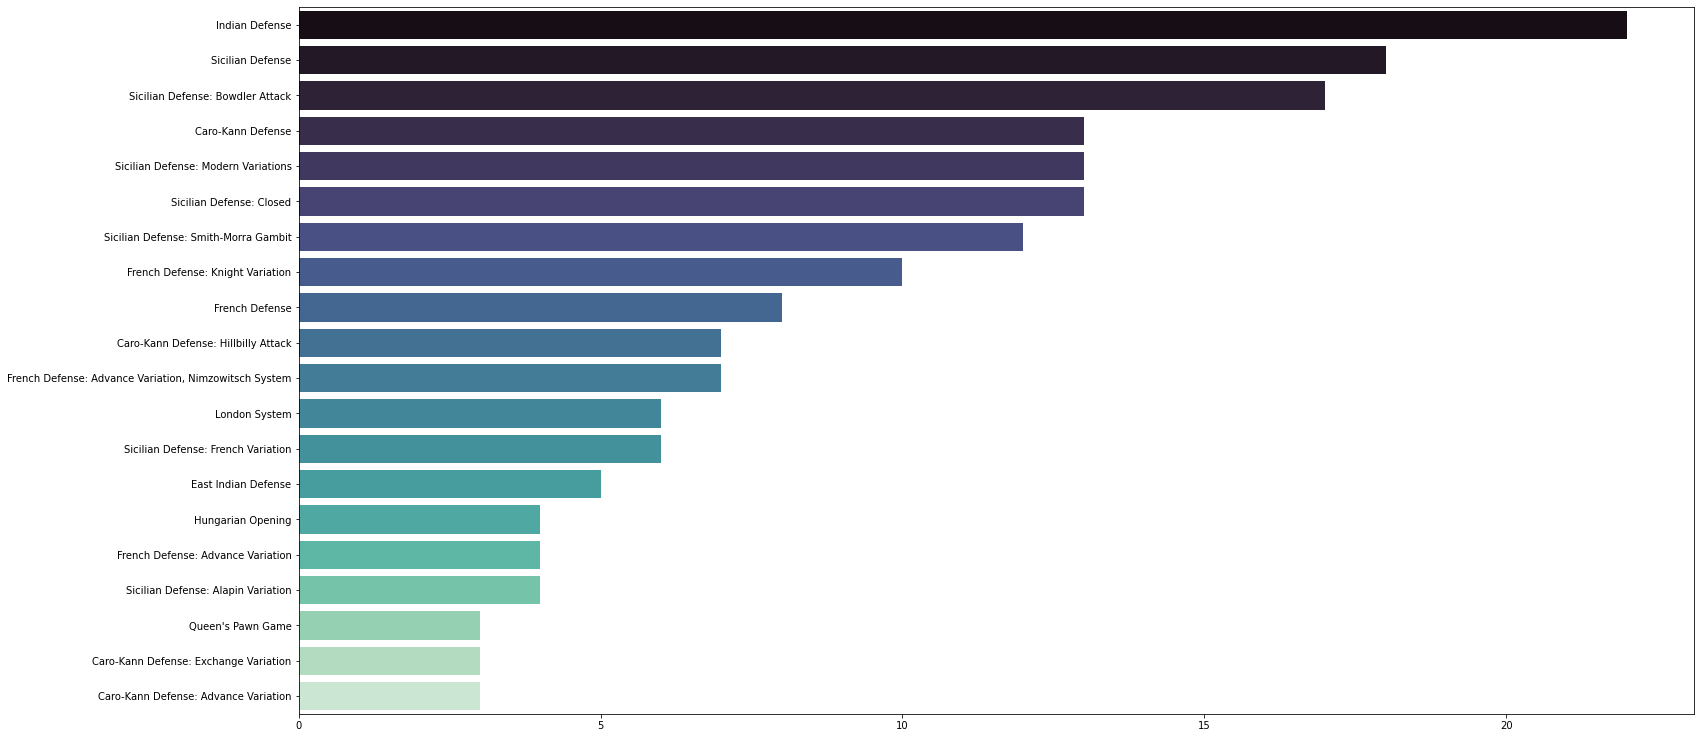

In [30]:
fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts().values[0:20], 
                 y=playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts().index[0:20],
                 palette='mako')

### ELO Curve

In [31]:
sorted_df = df.sort_values(by=['createdAt'])
sorted_df

,rated,variant,speed,perf,createdAt,status,winner,moves,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
1279,True,standard,classical,classical,2019-04-09 12:29:18.450000+00:00,draw,NaN,c4 e5 Nc3 Bc5 e3 Nf6 Nge2 Nc6 g3 b6 Bg2 Bb7 d4...,"{'initial': 900, 'increment': 15, 'totalTime':...",A21,"English Opening: King's English Variation, Rev...",'chestroyer',1500,'mass1962',1510,english opening
1278,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500,king pawn
1277,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,king pawn
1276,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,english opening
1275,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,True,standard,blitz,blitz,2022-10-28 19:05:03.104000+00:00,mate,white,e4 c6 d4 d5 exd5 cxd5 c4 e6 Nf3 Nc6 Nc3 Bb4 Qb...,"{'initial': 180, 'increment': 0, 'totalTime': ...",B13,Caro-Kann Defense: Panov Attack,'anjal132',1325,'chestroyer',1388,king pawn
3,True,standard,blitz,blitz,2022-10-28 19:10:17.591000+00:00,mate,white,e4 e5 Nf3 Nc6 Bb5 Nge7 O-O a6 Ba4 b5 Bb3 g6 c3...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C60,Ruy Lopez: Cozio Defense,'chestroyer',1381,'mexfr',1386,king pawn
2,True,standard,blitz,blitz,2022-10-28 19:20:13.624000+00:00,mate,white,e4 e5 Nf3 Nf6 Nxe5 Nc6 Nxc6 dxc6 d3 Bc5 g3 Qd4...,"{'initial': 180, 'increment': 0, 'totalTime': ...",C42,Russian Game: Stafford Gambit,'chestroyer',1387,'tolekbanan',1416,king pawn
1,True,standard,blitz,blitz,2022-10-28 22:31:28.553000+00:00,mate,black,d4 Nf6 c4 g6 Nc3 d5 Nf3 Bg7 e4 Bg4 Ne5 Bxd1 Nx...,"{'initial': 180, 'increment': 0, 'totalTime': ...",D90,Grünfeld Defense: Three Knights Variation,'santanu',1397,'chestroyer',1393,queen pawn


In [32]:
sorted_df['moves'][1]

'd4 Nf6 c4 g6 Nc3 d5 Nf3 Bg7 e4 Bg4 Ne5 Bxd1 Nxd1 Nxe4 c5 c6 Bd3 O-O O-O Nd7 Bf4 Nxe5 dxe5 Qc7 Ne3 Bxe5 Bh6 Rfe8 g3 f5 Kg2 Qa5 Rac1 Qxa2 b4 Qd2 Rfd1 Qxf2+ Kh1 Nxg3+ hxg3 Qxg3 Nxf5 Qh2#'

In [33]:
rating = player_rating(player_name, df)
rating = pd.DataFrame(rating, columns=['createdAt', 'speed', 'rating'])
rating = rating.sort_values(['createdAt'])
rating['rating'] = clean_rating(rating)
rating

,createdAt,speed,rating
1279,2019-04-09,classical,1500
1278,2019-04-12,rapid,1500
1276,2019-04-13,blitz,1500
1277,2019-04-13,rapid,1346
1275,2019-04-15,rapid,1241
...,...,...,...
4,2022-10-28,blitz,1388
3,2022-10-28,blitz,1381
2,2022-10-28,blitz,1387
1,2022-10-28,blitz,1393


In [34]:
rating['rating'] = rating['rating'].astype('int32')
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 1279 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   createdAt  1280 non-null   object
 1   speed      1280 non-null   object
 2   rating     1280 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 35.0+ KB


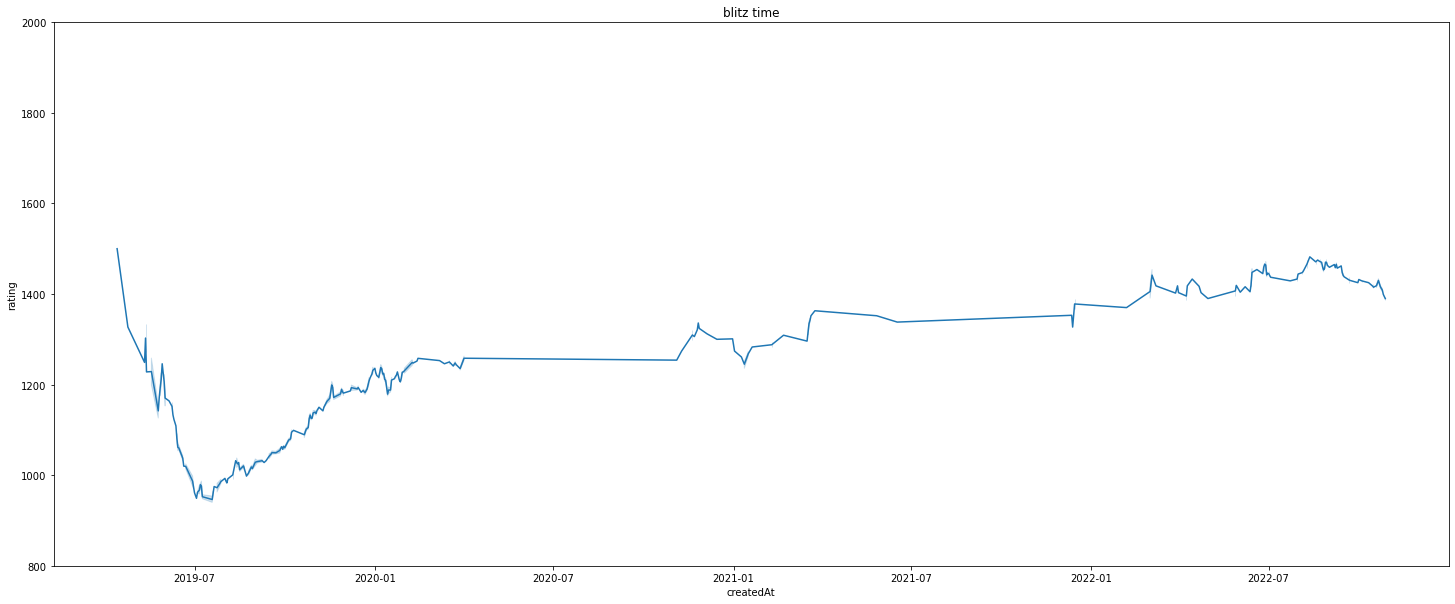

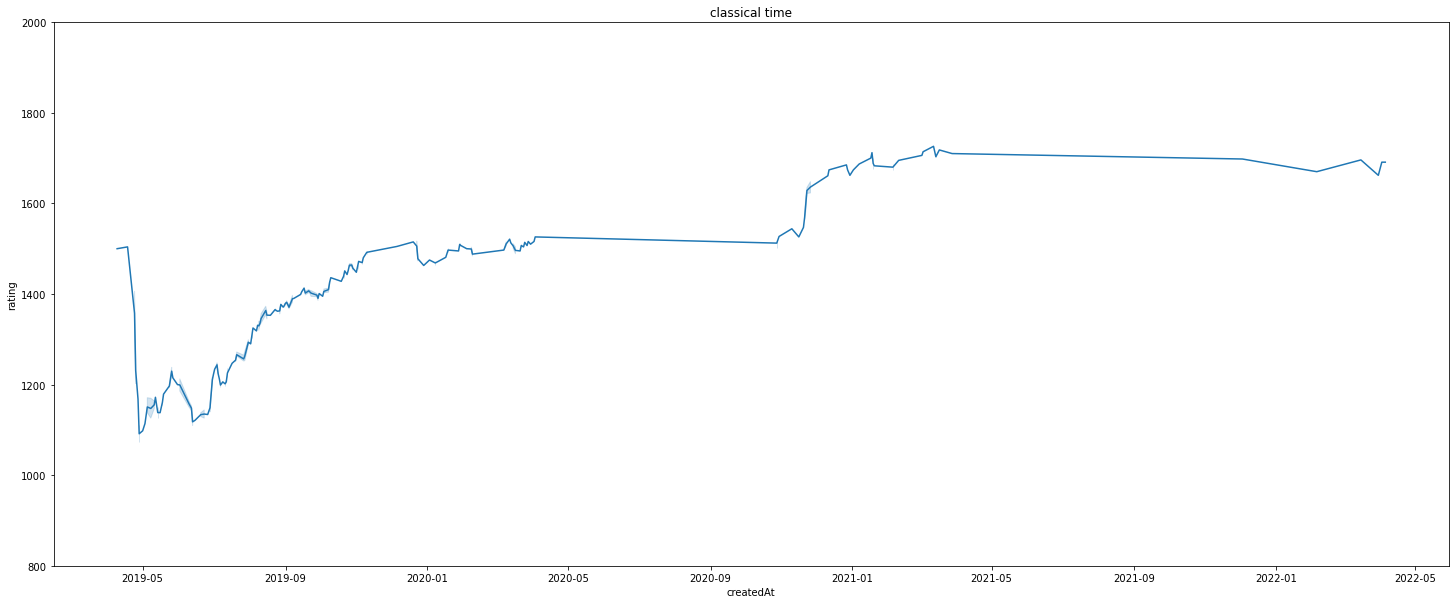

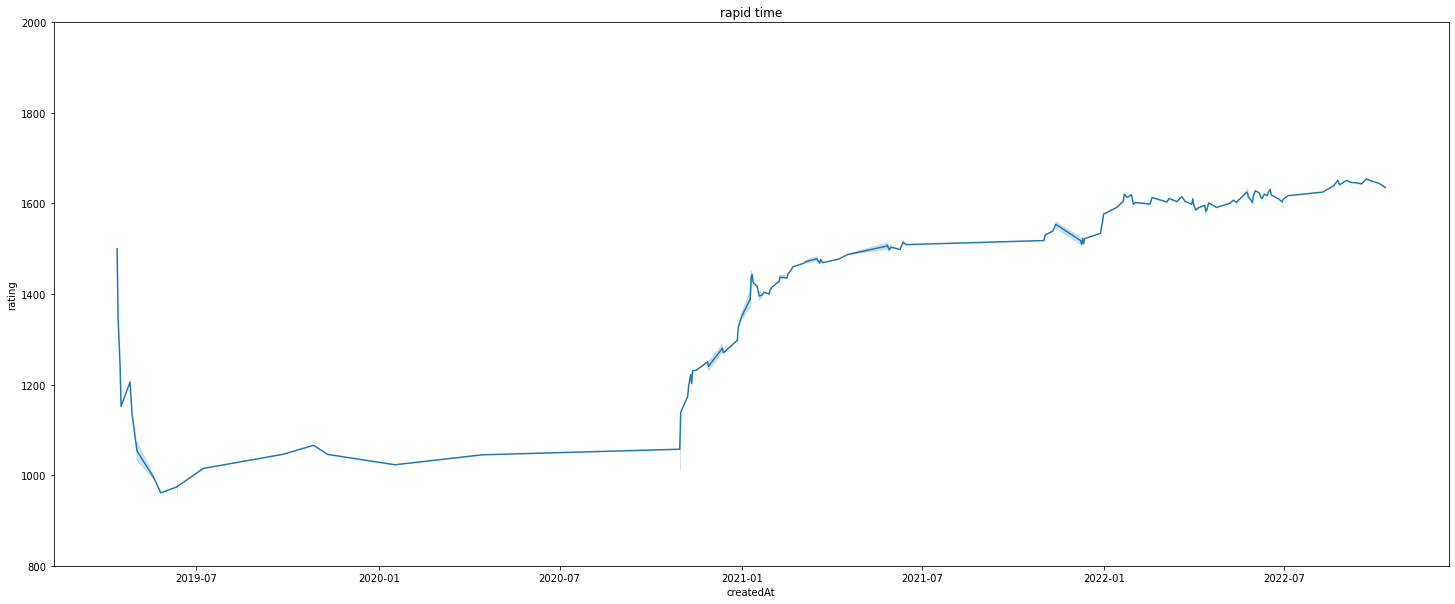

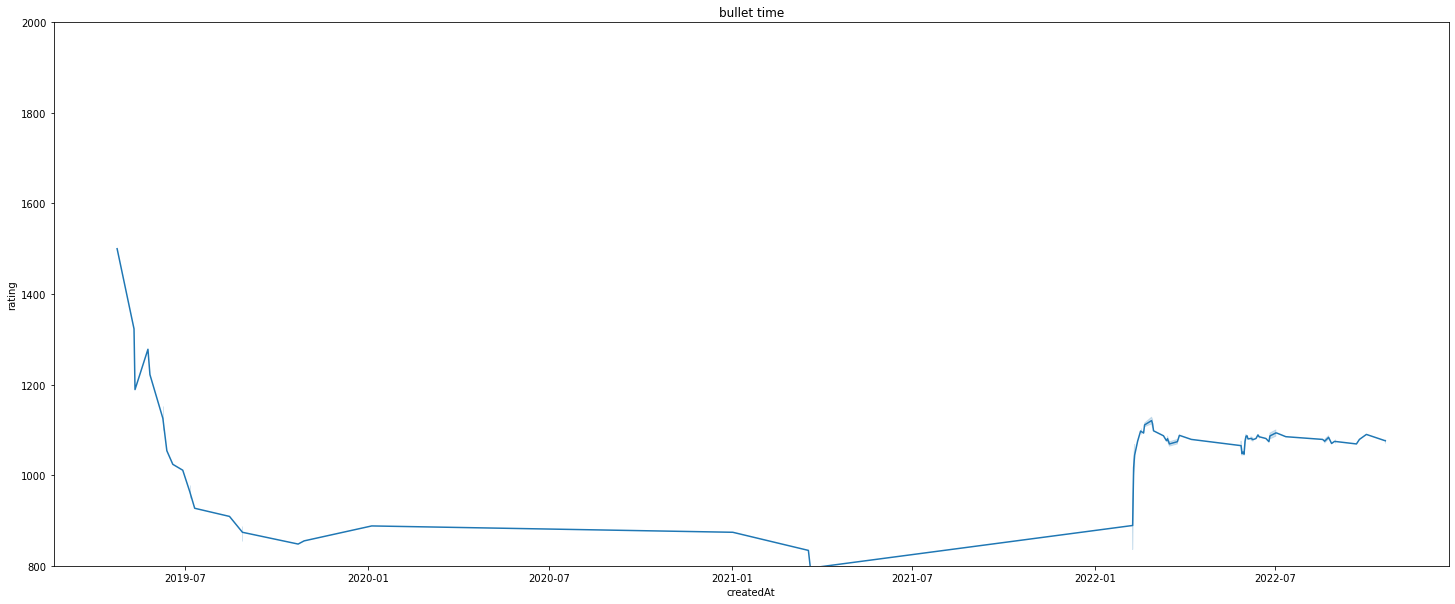

In [35]:
speed = [item for item in rating.speed.value_counts().index]
for item in speed[0:-1]:
    fig, ax = plt.subplots(figsize=(25, 10))
    ax = sns.lineplot(x=rating.loc[rating['speed']==item, :].createdAt, y=rating.loc[rating['speed']==item, :].rating)
    plt.title(f'{item} time')
    plt.ylim(800, 2000)

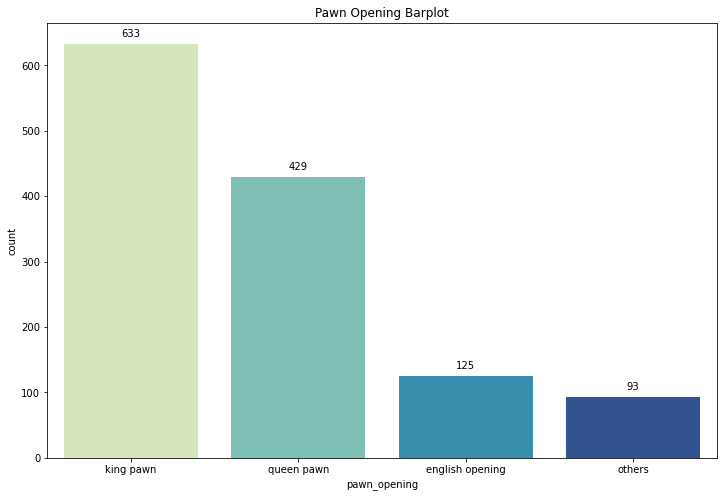

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=df, x='pawn_opening', palette='YlGnBu')
plt.title(f'Pawn Opening Barplot')
add_value_labels(ax)